<a href="https://colab.research.google.com/github/GajAhmadaaa/NanamYuk-ML/blob/main/Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# City Based Weather Analysis

In [ ]:
# importing the required libraries
import requests
# Enter the api key of openweathermap here
api_key = "81c713c1b0fea513c62681c97920daa9"
# Base url for the open map api
root_url = "http://api.openweathermap.org/data/2.5/weather?"
# Input the City name for which we need the weather data
city_name = input("Please Enter The City Name : ")
# Building the final url for the API call
url = f"{root_url}appid={api_key}&q={city_name}"
# sending a get request at the url
r = requests.get(url)
# storing the returned json data into a variable
data = r.json()
# Checking If there is no error and the status code is 200
if data['cod'] == 200:
    # getting the temperature from the json data
    temp = data['main']['temp'] - 273.15
    # getting the pressure from the json data
    pressure = data['main']['pressure']
    # getting the humidity from the json data
    humidity = data['main']['humidity']
    # getting the description from the json data
    descr = data['weather'][0]['description']
    # getting the wind speed from the json data
    wind = data['wind']['speed']
    # Displaying all the data
    print(f"City Name : {city_name}")
    print(f"The Weather Condition is {descr}")
    print(f"The temperature is {temp :.2f} Celsius")
    print(f"The pressure is {pressure}hPa")
    print(f"The humidity is {humidity}%")
    print(f"The speed of wind is {wind}m/s")
    print(url)
else:
    # If any error occured then print this
    print("Something Went Wrong")

Please Enter The City Name : Jakarta
City Name : Jakarta
The Weather Condition is heavy intensity rain
The temperature is 22.96 Celsius
The pressure is 1010hPa
The humidity is 83%
The speed of wind is 1.51m/s
http://api.openweathermap.org/data/2.5/weather?appid=81c713c1b0fea513c62681c97920daa9&q=Jakarta


## Improved City Based Weather Analysis but just avg Temp within month

In [ ]:
import requests
from datetime import datetime
today = datetime.today()

api_key = "81c713c1b0fea513c62681c97920daa9"

root_url = "https://history.openweathermap.org/data/2.5/aggregated/month?"

city_name = input("Please Enter The City Name : ")

url = f"{root_url}month={today.month}&q={city_name},ID&appid={api_key}"

r = requests.get(url)

data = r.json()
# Checking If there is no error and the status code is 200
if data['cod'] == 200:
    # getting the temperature from the json data
    temp = data['result']['temp']['mean'] - 273.15
    # getting the humidity from the json data
    humidity = data['result']['humidity']['mean']
    # getting the month from the json data
    month = data['result']['month']
    print(f"City Name : {city_name}")
    print(f"The avg temperature in month {month} is {temp :.2f} Celsius")
    print(f"The avg humidity in month {month} is {humidity :.2f} %")
    print(url)
else:
    message = data['message']
    print("Something Went Wrong,", message)

Please Enter The City Name : Jakarta
City Name : Jakarta
The avg temperature in month 5 is 28.63 Celsius
The avg humidity in month 5 is 77.34 %
https://history.openweathermap.org/data/2.5/aggregated/month?month=5&q=Jakarta,ID&appid=81c713c1b0fea513c62681c97920daa9


## Error handling with try except for location that has no weather history data

In [52]:
import requests
from datetime import datetime
today = datetime.today()

api_key = "81c713c1b0fea513c62681c97920daa9"
city_name = input("Please Enter The City Name : ")

###########################################################################
# Bisa dijadikan Method #
root_url = "https://history.openweathermap.org/data/2.5/aggregated/month?"
url = f"{root_url}month={today.month}&q={city_name},ID&appid={api_key}"
r = requests.get(url)
data = r.json()

root_url2 = "https://api.openweathermap.org/data/2.5/weather?"
url2 = f"{root_url2}q={city_name}&appid={api_key}"
r2 = requests.get(url2)
data2 = r2.json()
############################################################################

# Checking If there is no error and the status code is 200
try:
  if data['cod'] == 200:
      # getting the temperature from the json data
      temp = data['result']['temp']['mean'] - 273.15
      # getting the humidity from the json data
      humidity = data['result']['humidity']['mean']
      precipitation = data['result']['precipitation']['mean']
      # getting the month from the json data
      month = data['result']['month']
      print(f"City Name : {city_name}")
      print(f"The avg temperature in month {month} is {temp :.2f} Celsius")
      print(f"The avg humidity in month {month} is {humidity :.2f} %")
      print(f"The avg humidity in month {month} is {precipitation * 100 :.2f} %")
      print(url)
  else:
      message = data['message']
      print("Something Went Wrong,", message)
except:
  if data['code'] == 404000:
    message = data['message']
    print(f"Error, {message}. Switching to current weather....")
    # getting the temperature from the json data
    temp = data2['main']['temp'] - 273.15
    # getting the humidity from the json data
    humidity = data2['main']['humidity']
    print(f"City Name : {city_name}")
    print(f"The current temperature is {temp :.2f} Celsius")
    print(f"The current humidity is {humidity :.2f} %")
    print(url2)

Please Enter The City Name : jakarta
City Name : jakarta
The avg temperature in month 5 is 28.62 Celsius
The avg humidity in month 5 is 77.31 %
The avg humidity in month 5 is 8.00 %
https://history.openweathermap.org/data/2.5/aggregated/month?month=5&q=jakarta,ID&appid=81c713c1b0fea513c62681c97920daa9


# Dummy Dataset

In [53]:
import pandas as pd
import numpy as np
np.random.seed(0)
data1 =pd.DataFrame({"Temperature" : np.random.uniform(20, 33, 500).round(2),
                     "Soil" : np.random.choice(range(1,4), p=[0.2, 0.6, 0.2], size=500, replace=True),
                     "Light" : np.random.choice(range(1,2), 500, replace=True),
                     "Humid" : np.random.uniform(50, 61, 500).round(2),
                     "Label"  : "Bayam Hijau"})
data2 =pd.DataFrame({"Temperature" : np.random.uniform(20,28, 500).round(2),
                     "Soil" : np.random.choice(range(1,4), p=[0.2, 0.6, 0.2], size=500, replace=True),
                     "Light" : np.random.choice(range(1,2), 500, replace=True),
                     "Humid" : np.random.uniform(60, 81, 500).round(2),
                     "Label"  : "Tomat"})
data3 =pd.DataFrame({"Temperature" : np.random.uniform(25,30, 500).round(2),
                     "Soil" : np.random.choice(range(1,4), p=[0.2, 0.6, 0.2], size=500, replace=True),
                     "Light" : np.random.choice(range(1,3), 500, replace=True),
                     "Humid" : np.random.uniform(50, 81 , 500).round(2),
                     "Label"  : "Kangkung"})
data4 =pd.DataFrame({"Temperature" : np.random.uniform(22,30, 500).round(2),
                     "Soil" : np.random.choice(range(1,4), p=[0.2, 0.6, 0.2], size=500, replace=True),
                     "Light" : np.random.choice(range(1,2), 500, replace=True),
                     "Humid" : np.random.uniform(80, 91, 500).round(2),
                     "Label"  : "Terung"})
data5 =pd.DataFrame({"Temperature" : np.random.uniform(18,20, 500).round(2),
                     "Soil" : np.random.choice(range(1,4), p=[0.2, 0.6, 0.2], size=500, replace=True),
                     "Light" : np.random.choice(range(1,3), 500, replace=True),
                     "Humid" : np.random.uniform(80, 91, 500).round(2),
                     "Label"  : "Kubis"})
data6 =pd.DataFrame({"Temperature" : np.random.uniform(21,32, 500).round(2),
                     "Soil" : np.random.choice(range(1,4), p=[0.6, 0.2, 0.2], size=500, replace=True),
                     "Light" : np.random.choice(range(2,3), 500, replace=True),
                     "Humid" : np.random.uniform(30, 51, 500).round(2),
                     "Label"  : "Lidah Mertua"})
data7 =pd.DataFrame({"Temperature" : np.random.uniform(23,30, 500).round(2),
                     "Soil" : np.random.choice(range(1,4), p=[0.4, 0.5, 0.1], size=500, replace=True),
                     "Light" : np.random.choice(range(2,3), 500, replace=True),
                     "Humid" : np.random.uniform(50, 61, 500).round(2),
                     "Label"  : "Sri Rezeki"})
data8 =pd.DataFrame({"Temperature" : np.random.uniform(20,33, 500).round(2),
                     "Soil" : np.random.choice(range(1,4), p=[0.6, 0.2, 0.2], size=500, replace=True),
                     "Light" : np.random.choice(range(1,3), 500, replace=True),
                     "Humid" : np.random.uniform(35, 46, 500).round(2),
                     "Label"  : "Lidah Buaya"})
data9 =pd.DataFrame({"Temperature" : np.random.uniform(18,31, 500).round(2),
                     "Soil" : np.random.choice(range(1,4), p=[0.6, 0.2, 0.2], size=500, replace=True),
                     "Light" : np.random.choice(range(1,3), 500, replace=True),
                     "Humid" : np.random.uniform(50, 71, 500).round(2),
                     "Label"  : "Kuping Gajah"})
data10 =pd.DataFrame({"Temperature" : np.random.uniform(16,32, 500).round(2),
                     "Soil" : np.random.choice(range(1,4), p=[0.6, 0.2, 0.2], size=500, replace=True),
                     "Light" : np.random.choice(range(1,2), 500, replace=True),
                     "Humid" : np.random.uniform(80, 96, 500).round(2),
                     "Label"  : "Lavender"})
data11 =pd.DataFrame({"Temperature" : np.random.uniform(16,30, 500).round(2),
                     "Soil" : np.random.choice(range(1,4), p=[0.3, 0.3, 0.4], size=500, replace=True),
                     "Light" : np.random.choice(range(1,2), 500, replace=True),
                     "Humid" : np.random.uniform(50, 61, 500).round(2),
                     "Label"  : "Mawar"})
data12 =pd.DataFrame({"Temperature" : np.random.uniform(24,36, 500).round(2),
                     "Soil" : np.random.choice(range(1,4), p=[0.4, 0.2, 0.4], size=500, replace=True),
                     "Light" : np.random.choice(range(1,2), 500, replace=True),
                     "Humid" : np.random.uniform(50, 81, 500).round(2),
                     "Label"  : "Melati"})

In [54]:
df = data1.append(data2, ignore_index=True).append(data3, ignore_index=True).append(data4, ignore_index=True).append(data5, ignore_index=True)\
          .append(data6, ignore_index=True).append(data7, ignore_index=True).append(data8, ignore_index=True).append(data9, ignore_index=True)\
          .append(data10, ignore_index=True).append(data11, ignore_index=True).append(data12, ignore_index=True)
df

,Temperature,Soil,Light,Humid,Label
0,27.13,2,1,56.52,Bayam Hijau
1,29.30,2,1,50.11,Bayam Hijau
2,27.84,2,1,55.23,Bayam Hijau
3,27.08,2,1,57.80,Bayam Hijau
4,25.51,2,1,50.48,Bayam Hijau
...,...,...,...,...,...
5995,28.82,3,1,63.40,Melati
5996,34.49,2,1,79.80,Melati
5997,30.43,3,1,60.23,Melati
5998,28.25,1,1,50.85,Melati


In [55]:
# Example using good dataset
# df = pd.read_csv('/content/Crop_recommendation.csv')
# df = df.drop(['N', 'P', 'K'], axis=1)

# Model Creation | TensorFlow Raw

In [56]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [57]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('accuracy') > 0.8):

      # Stop if threshold is met
      print("\naccuracy is more than 0.8 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [58]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [59]:
print(X[0:5])
print(y[0:5])

[[27.13  2.    1.   56.52]
 [29.3   2.    1.   50.11]
 [27.84  2.    1.   55.23]
 [27.08  2.    1.   57.8 ]
 [25.51  2.    1.   50.48]]
['Bayam Hijau' 'Bayam Hijau' 'Bayam Hijau' 'Bayam Hijau' 'Bayam Hijau']


In [60]:
print(X.shape)
print(y.shape)

(6000, 4)
(6000,)


In [61]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

In [62]:
print(y1)

[0 0 0 ... 8 8 8]


In [63]:
Y = pd.get_dummies(y1).values
print(Y[0:5])

[[1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]]


In [64]:
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [65]:
print(X_train[0:5])

[[25.34  2.    2.   64.7 ]
 [31.95  2.    1.   55.57]
 [23.    1.    1.   81.54]
 [25.38  3.    1.   52.85]
 [22.39  2.    1.   52.67]]


In [66]:
print(y_train[0:5])

[[0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]]


In [67]:
print(X_test[0:5])

[[18.19  2.    1.   80.47]
 [19.96  3.    1.   80.09]
 [23.51  1.    2.   36.69]
 [25.73  2.    1.   60.55]
 [27.46  1.    1.   80.93]]


In [68]:
print(y_test[0:5])

[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]]


In [152]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=4, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
    # tf.keras.layers.Dense(22, activation='softmax') Example Using good Dataset
  ])
model

In [153]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [156]:
history = model.fit(X_train, y_train, 
                    batch_size=50, 
                    epochs=1000, 
                    validation_data=(X_val, y_val),
                    callbacks=[callbacks])

Epoch 1/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.7067 - accuracy: 0.6900 - val_loss: 0.7612 - val_accuracy: 0.6725
Epoch 2/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.7136 - accuracy: 0.6861 - val_loss: 0.7018 - val_accuracy: 0.6975
Epoch 3/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.7071 - accuracy: 0.6931 - val_loss: 0.7245 - val_accuracy: 0.6725
Epoch 4/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.7214 - accuracy: 0.6792 - val_loss: 0.7510 - val_accuracy: 0.6833
Epoch 5/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.7295 - accuracy: 0.6786 - val_loss: 0.7898 - val_accuracy: 0.6467
Epoch 6/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.7239 - accuracy: 0.6825 - val_loss: 0.7738 - val_accuracy: 0.6667
Epoch 7/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.7299 - accuracy: 0.6775 - val_loss: 0.7131 - val_accuracy: 0.6950
Epoch 

In [157]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.7119388580322266
Test accuracy: 0.6924999952316284


Text(0.5, 1.0, 'Training and validation loss')

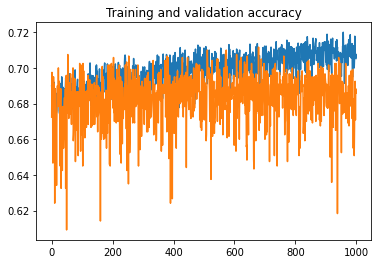

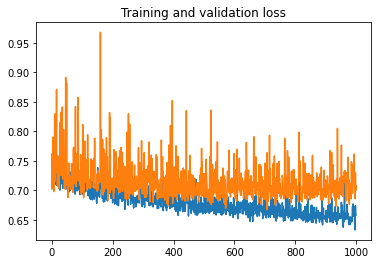

In [158]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss')

In [74]:
y_pred = model.predict(X_test)
y_pred

array([[9.9220431e-20, 2.9922996e-23, 7.2618508e-01, ..., 9.4813587e-24,
        1.8137180e-07, 8.1826147e-05],
       [1.2394283e-10, 2.9275610e-11, 3.6953855e-01, ..., 1.7794609e-17,
        1.6500628e-01, 3.2257432e-01],
       [4.6294363e-10, 5.6892077e-06, 6.0332534e-31, ..., 2.9383109e-06,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.4517970e-01, 2.0842746e-02, 1.2133833e-11, ..., 9.8338319e-07,
        1.9883677e-07, 3.4490547e-01],
       [2.1708179e-01, 9.1028497e-02, 3.9997276e-18, ..., 1.2549350e-05,
        4.6417866e-13, 3.1981224e-05],
       [3.0297271e-28, 8.7844546e-34, 5.6414914e-01, ..., 3.6866218e-31,
        2.5169118e-07, 6.2646268e-07]], dtype=float32)

In [75]:
actual = np.argmax(y_test,axis=1)
predicted = np.argsort(y_pred,axis=1)
print(f"Actual: {encoder.inverse_transform(actual[:1])}\nPredicted: ")
for top_5 in predicted[:1,7:]:
  top_5 = encoder.inverse_transform(top_5)
  i = 1
  for name in top_5[::-1]:
    print(f"{i}. {name}")
    i += 1

Actual: ['Kubis']
Predicted: 
1. Kubis
2. Lavender
3. Tomat
4. Terung
5. Kuping Gajah


In [76]:
input = model.predict([[temp, 1, 1, humidity]])
output = np.argsort(input, axis=1)[:,7:].flatten()
print(encoder.inverse_transform(output))

['Lavender' 'Terung' 'Tomat' 'Kangkung' 'Melati']


# Model Creation | LightGBM

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [ ]:
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 8)

In [ ]:
# Creating a lightgbm model
import lightgbm as lgb

model = lgb.LGBMClassifier()

# Training the model using Training Data
model.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
# Predicting the outputs over testing data
y_pred=model.predict(X_test)


In [ ]:
# Library to measure accuracy of model
from sklearn.metrics import accuracy_score

# Find accuracy on Expected Output and Predicted Output on Testing Data
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.6725


In [ ]:
# Find Training Score on Expected Output and Predicted Output on Training Data
y_pred_train = model.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9175
